<a href="https://colab.research.google.com/github/ShakilM26/employee-analysis.project/blob/main/project_employee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [3]:
df = pd.read_csv('employee.csv')
df.head(5)

,full_name,gender,address,country,university,job_title,company,salary,credit_card,balance,vehicle,birthday,shirt_size
0,Andreana Nelthropp,M,76864 Holmberg Lane,Japan,Hiroshima Jogakuin University,Payment Adjustment Coordinator,Dynava,$93600.17,visa-electron,$88864.70,NaN,24/06/1996,XS
1,Janet Angear,M,95564 Autumn Leaf Place,Spain,Universidad Abierta Interactiva,Project Manager,Brainverse,$31546.34,visa,$484569.29,Mazda,28/05/1999,XL
2,Julian Desport,F,12802 Pierstorff Circle,Russia,St. Petersburg State Cinema and TV University,Speech Pathologist,Wikido,$28385.32,instapayment,$208092.27,Peugeot,03/06/1996,2XL
3,Jock Olorenshaw,M,20 Kedzie Hill,Russia,Nevsky Institute of Language and Culture,Executive Secretary,Blogpad,$51164.86,mastercard,$248698.69,Jaguar,15/02/1994,XL
4,Ethelred McConigal,M,363 Dottie Crossing,Canada,Carleton University,Quality Control Specialist,Blogtags,$62046.15,solo,$316809.49,GMC,01/02/1991,XS


In [4]:
df.isnull().sum()

full_name       0
gender          0
address         0
country         0
university      0
job_title       0
company        60
salary         59
credit_card    17
balance        39
vehicle        55
birthday        0
shirt_size      0
dtype: int64

# **Data Cleaning**

****We can see that our dataset has some null values. I will print only those columns that have null values. Then we start our cleaning operations.****

In [5]:
df.columns[df.isnull().any()]

Index(['company', 'salary', 'credit_card', 'balance', 'vehicle'], dtype='object')

In [6]:
cols = df.columns[df.isnull().any()]
df[cols].isnull().sum()

company        60
salary         59
credit_card    17
balance        39
vehicle        55
dtype: int64

In [7]:
# percentage of null values 

for col in df.columns:
    missing_percent = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing_percent*100)))

full_name - 0%
gender - 0%
address - 0%
country - 0%
university - 0%
job_title - 0%
company - 6%
salary - 6%
credit_card - 2%
balance - 4%
vehicle - 6%
birthday - 0%
shirt_size - 0%


**Here we visualize this null values of our dataset using seaborn. we can clearly see that we have null values in salary, balance and vehicle column.**

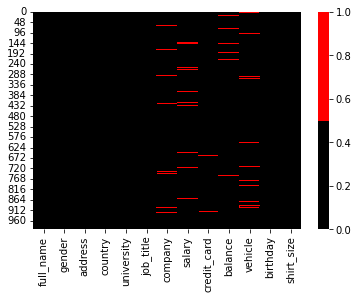

In [8]:
# 
cols = df.columns
colors = ['black', 'red']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))

**We can't fill our values using median,mean or any other method. because there are '$' sign.**
**We have to get rid of it.**

In [9]:
df['salary'] = df['salary'].replace(r'\$', r'', regex=True)

In [10]:
df['balance'] = df['balance'].replace(r'\$', r'', regex=True)

In [11]:
# Now check again and '$' sign is vanish. 
df.head(1)

,full_name,gender,address,country,university,job_title,company,salary,credit_card,balance,vehicle,birthday,shirt_size
0,Andreana Nelthropp,M,76864 Holmberg Lane,Japan,Hiroshima Jogakuin University,Payment Adjustment Coordinator,Dynava,93600.17,visa-electron,88864.70,NaN,24/06/1996,XS


Now here is the thing. we remove '$' sign so that we can fill our nan values. but if we check our datatype we can see that our integer columns represent an object. There is no numeric columns. so we have to make it numeric. then we convert it to an integer. 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    1000 non-null   object
 1   gender       1000 non-null   object
 2   address      1000 non-null   object
 3   country      1000 non-null   object
 4   university   1000 non-null   object
 5   job_title    1000 non-null   object
 6   company      940 non-null    object
 7   salary       941 non-null    object
 8   credit_card  983 non-null    object
 9   balance      961 non-null    object
 10  vehicle      945 non-null    object
 11  birthday     1000 non-null   object
 12  shirt_size   1000 non-null   object
dtypes: object(13)
memory usage: 101.7+ KB


In [13]:
# Make it numeric.

df['salary'] = pd.to_numeric(df['salary'], errors='coerce')
df['balance'] = pd.to_numeric(df['balance'], errors='coerce')

In [14]:
# make it integer. but still we have nan values and cannot convert float to integer.
# I'm using median value fill our nan values

median_salary = df['salary'].median()
print(median_salary)

median_balance = df['balance'].median()
print(median_balance)

66477.57
315952.68


In [15]:
df['salary'] = df['salary'].fillna(median_salary)
df['balance'] = df['balance'].fillna(median_balance)

# I checked again and there are no more null values ​​in these two columns. Now make it integer.

In [16]:
df['salary'] = df['salary'].apply(np.int64)
df['balance'] = df['balance'].apply(np.int64)
df.info()

# You can clearly see that we have converted these columns to an integer.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    1000 non-null   object
 1   gender       1000 non-null   object
 2   address      1000 non-null   object
 3   country      1000 non-null   object
 4   university   1000 non-null   object
 5   job_title    1000 non-null   object
 6   company      940 non-null    object
 7   salary       1000 non-null   int64 
 8   credit_card  983 non-null    object
 9   balance      1000 non-null   int64 
 10  vehicle      945 non-null    object
 11  birthday     1000 non-null   object
 12  shirt_size   1000 non-null   object
dtypes: int64(2), object(11)
memory usage: 101.7+ KB


However, our dataset contains other object columns that have null values. Some columns we will use to track our null values.
And some columns we will fill depending on the value of our other columns.



In [17]:
# I have 60 nan values in this column. 
# I decided to use limits to fill our nan values so that we can use multiple values.
# I have divided these 60 null values ​​into 4 parts.

df = df.fillna(value={'company':'Google'}, limit=20)

In [18]:
df = df.fillna(value={'company':'Apple'}, limit=12)

In [19]:
df = df.fillna(value={'company':'Facebook'}, limit=10)

In [20]:
df = df.fillna(value={'company':'Microsoft'}, limit=10)

In [21]:
df = df.fillna(value={'company':'Amazon'}, limit=8)

In [22]:
# Since here our dataset is generated from fake data generating website. So here are the random company names. 
# So I am replacing some of the familiar names for our convenience.

df = df.replace({'company':{'Wikizz':'Netflix', 'Browsecat':'IBM', 'Pixoboo':'Intel'}})

In [23]:
df['company'].value_counts().head(10)

Google       20
Apple        12
Facebook     10
Microsoft    10
IBM           8
Amazon        8
Netflix       8
Intel         8
Talane        7
Mita          7
Name: company, dtype: int64

In [24]:
# fill missing values in credit_card and vehicle using zeroes.
# why we doing this ? because we can replace this zeroes and add nearly acurate values in those columns, based on our salary column.

fill missing values in credit_card and vehicle using zeroes.
# why we doing this ? because we can replace this zeroes and add nearly acurate values in those columns, based on our salary column.

In [25]:
df[['credit_card', 'vehicle']] = df[['credit_card', 'vehicle']].fillna('zeroes')

In [26]:
# Now it's time to replace zeros. First of all we divide our salary column into 5 part. so that we can check easily 
# which car should be acurate for this range. 

**20k to 35k**

In [27]:
df[(df['salary'] < 35000) & (df['salary'] >= 20000)]['vehicle'].value_counts().head(10)

Dodge         15
Chevrolet     12
Ford          11
Lincoln        7
Pontiac        7
BMW            6
Mitsubishi     6
GMC            6
zeroes         5
Isuzu          5
Name: vehicle, dtype: int64

In [28]:
# Using condition

condi = [(df['salary'] < 35000) & (df['salary'] >= 20000) & (df['vehicle']=='zeroes')]
values = ['Dodge']
df['vehicle'] = np.select(condi, values, default=df['vehicle'])

In [29]:
# Checking 

df[(df['salary'] < 35000) & (df['salary'] >= 20000)]['vehicle'].value_counts().head(5)

Dodge        20
Chevrolet    12
Ford         11
Pontiac       7
Lincoln       7
Name: vehicle, dtype: int64

**35k to 50k**

In [30]:
df[(df['salary'] < 50000) & (df['salary'] >= 35000)]['vehicle'].value_counts().head(10)

Ford          15
GMC           10
zeroes         9
Chevrolet      7
Toyota         6
Mazda          6
Lexus          5
Mitsubishi     5
Honda          5
Nissan         4
Name: vehicle, dtype: int64

In [31]:
condi = [(df['salary'] < 50000) & (df['salary'] >= 35000) & (df['vehicle']=='zeroes')]
values = ['Ford']
df['vehicle'] = np.select(condi, values, default=df['vehicle'])

In [32]:
df[(df['salary'] < 50000) & (df['salary'] >= 35000)]['vehicle'].value_counts().head(5)

Ford         24
GMC          10
Chevrolet     7
Toyota        6
Mazda         6
Name: vehicle, dtype: int64

**50k to 70k**

In [33]:
df[(df['salary'] < 70000) & (df['salary'] >= 50000)]['vehicle'].value_counts().head(10)

Ford             25
Chevrolet        18
Dodge            17
Mercedes-Benz    14
Mitsubishi       13
Toyota           13
GMC              12
Pontiac          12
zeroes           11
Honda            11
Name: vehicle, dtype: int64

In [34]:
condi = [(df['salary'] < 70000) & (df['salary'] >= 50000) & (df['vehicle']=='zeroes')]
values = ['Ford']
df['vehicle'] = np.select(condi, values, default=df['vehicle'])

In [35]:
df[(df['salary'] < 70000) & (df['salary'] >= 50000)]['vehicle'].value_counts().head(5)

Ford             36
Chevrolet        18
Dodge            17
Mercedes-Benz    14
Mitsubishi       13
Name: vehicle, dtype: int64

**70k to 90k**

In [36]:
df[(df['salary'] < 90000) & (df['salary'] >= 70000)]['vehicle'].value_counts().head(10)

Chevrolet        17
Ford             15
zeroes           14
Dodge            13
Toyota           13
Mercedes-Benz    11
GMC              10
Volkswagen       10
Lincoln           8
Suzuki            8
Name: vehicle, dtype: int64

In [37]:
condi = [(df['salary'] < 90000) & (df['salary'] >= 70000) & (df['vehicle']=='zeroes')]
values = ['Chevrolet']
df['vehicle'] = np.select(condi, values, default=df['vehicle'])

In [38]:
df[(df['salary'] < 90000) & (df['salary'] >= 70000)]['vehicle'].value_counts().head(5)

Chevrolet        31
Ford             15
Dodge            13
Toyota           13
Mercedes-Benz    11
Name: vehicle, dtype: int64

**90k to 110k**

In [39]:
df[(df['salary'] < 110000) & (df['salary'] >= 90000)]['vehicle'].value_counts().head(10)

GMC           17
Ford          17
zeroes        16
Dodge         15
Volkswagen    13
Chevrolet     10
Toyota         9
Mitsubishi     7
Pontiac        6
BMW            6
Name: vehicle, dtype: int64

In [40]:
condi = [(df['salary'] < 110000) & (df['salary'] >= 90000) & (df['vehicle']=='zeroes')]
values = ['Volkswagen']
df['vehicle'] = np.select(condi, values, default=df['vehicle'])

In [41]:
df[(df['salary'] < 110000) & (df['salary'] >= 90000)]['vehicle'].value_counts().head(5)

Volkswagen    29
GMC           17
Ford          17
Dodge         15
Chevrolet     10
Name: vehicle, dtype: int64

**In the same way, fill the credit_card column**

In [42]:
# first check total count of every credit_card

df['credit_card'].value_counts()

visa-electron      163
visa               156
instapayment       143
mastercard         141
solo               132
bankcard           127
americanexpress    121
zeroes              17
Name: credit_card, dtype: int64

In [45]:
df[df['credit_card']=='zeroes'].sort_values(by='salary').head(2)

# Actually I am checking before implementing the process.
# I am looking for minimum salary. Because I need to know which range to start from.

,full_name,gender,address,country,university,job_title,company,salary,credit_card,balance,vehicle,birthday,shirt_size
759,Hedvig Murby,M,06398 Karstens Road,United States,Milwaukee School of Engineering,Quality Control Specialist,Facebook,30857,zeroes,315952,Honda,15/09/1997,S
460,Shaine Sandilands,M,184 Maple Junction,Croatia,University of Zadar,Director of Sales,Digitube,31479,zeroes,460101,Mercedes-Benz,17/08/1997,M


**30k to 50k**

In [46]:
df[(df.salary >= 30000) & (df.salary < 50000)]['credit_card'].value_counts()

instapayment       33
visa-electron      33
bankcard           27
mastercard         26
visa               25
solo               18
americanexpress    15
zeroes              3
Name: credit_card, dtype: int64

In [47]:
condi = [(df.salary < 50000) & (df.salary >= 30000) & (df.credit_card=='zeroes')]
values = ['visa-electron']
df['credit_card'] = np.select(condi, values, default=df['credit_card'])

In [48]:
df[(df.salary >= 30000) & (df.salary < 50000)]['credit_card'].value_counts()

visa-electron      36
instapayment       33
bankcard           27
mastercard         26
visa               25
solo               18
americanexpress    15
Name: credit_card, dtype: int64

**50k to 70k**

In [49]:
df[(df.salary >= 50000) & (df.salary < 70000)]['credit_card'].value_counts()

mastercard         45
americanexpress    45
visa               44
solo               42
instapayment       39
visa-electron      38
bankcard           35
zeroes              5
Name: credit_card, dtype: int64

In [50]:
condi = [(df.salary < 70000) & (df.salary >= 50000) & (df.credit_card=='zeroes')]
values = ['mastercard']
df['credit_card'] = np.select(condi, values, default=df['credit_card'])

In [51]:
df[(df.salary >= 50000) & (df.salary < 70000)]['credit_card'].value_counts()

mastercard         50
americanexpress    45
visa               44
solo               42
instapayment       39
visa-electron      38
bankcard           35
Name: credit_card, dtype: int64

**70k to 90k**

In [52]:
df[(df.salary >= 70000) & (df.salary < 90000)]['credit_card'].value_counts()

visa               38
visa-electron      36
solo               34
americanexpress    29
mastercard         29
instapayment       28
bankcard           24
zeroes              5
Name: credit_card, dtype: int64

In [53]:
condi = [(df.salary >= 70000) & (df.salary < 90000) & (df.credit_card=='zeroes')]
values = ['visa']
df['credit_card'] = np.select(condi, values, default=df['credit_card'])

In [54]:
df[(df.salary >= 70000) & (df.salary < 90000)]['credit_card'].value_counts()

visa               43
visa-electron      36
solo               34
americanexpress    29
mastercard         29
instapayment       28
bankcard           24
Name: credit_card, dtype: int64

**90k to 110k**

In [55]:
df[(df.salary >= 90000) & (df.salary <= 110000)]['credit_card'].value_counts()

visa               36
visa-electron      35
instapayment       30
bankcard           27
solo               26
mastercard         25
americanexpress    21
zeroes              4
Name: credit_card, dtype: int64

In [56]:
condi = [(df.salary >= 90000) & (df.salary <= 110000) & (df.credit_card=='zeroes')]
values = ['visa']
df['credit_card'] = np.select(condi, values, default=df['credit_card'])

In [57]:
df[(df.salary >= 90000) & (df.salary <= 110000)]['credit_card'].value_counts()

visa               40
visa-electron      35
instapayment       30
bankcard           27
solo               26
mastercard         25
americanexpress    21
Name: credit_card, dtype: int64

In [58]:
df['credit_card'].value_counts()

visa-electron      166
visa               165
mastercard         146
instapayment       143
solo               132
bankcard           127
americanexpress    121
Name: credit_card, dtype: int64

#**Statistical Analysis**

**Descriptive**

In [ ]:
df.describe()

# we can include='all' to have object col also

,salary,balance
count,1000.000000,1000.000000
mean,65640.613000,310704.785000
std,24801.138643,134353.381271
min,20030.000000,81126.000000
25%,45979.000000,193296.500000
50%,66477.000000,315952.000000
75%,85411.500000,422729.500000
max,109805.000000,549344.000000


In [ ]:
# numerical 

df['salary'].describe().astype(int)

count      1000
mean      65640
std       24801
min       20030
25%       45979
50%       66477
75%       85411
max      109805
Name: salary, dtype: int64

In [ ]:
# categorical

df['country'].describe()

count       1000
unique        16
top       Russia
freq         321
Name: country, dtype: object

In [ ]:
# we can break down descriptive statistics functions

print('Standard Deviation:', df['salary'].std())
print('Average of balance:', df['balance'].mean())
print('0.50 Quartile:', df['salary'].quantile(q=0.50))

Standard Deviation: 24801.138643401846
Average of balance: 310704.785
0.50 Quartile: 66477.0


In [ ]:
# The mode is the value that appears most often in a set of data values. 
# mode() - mostly used for categorical data.
# together (mean, median and mode) called central tendency. 

print(df['salary'].mode())
print(df['balance'].mode())

0    66477
dtype: int64
0    315952
dtype: int64


In [ ]:
# there are some other functions ... sum, cumsum, abs etc.

In [ ]:
# sample is a small representative things who can represent main dataset.
# It saves time, boosts the performance of the model, and improves visualization.

sample = df.sample(frac=0.25)

In [ ]:
# we can create bins to divide the data into a certain range. 
# The Binning method is used to normalize the data and make it smooth by removing noise from the data.

pd.cut(df['salary'], bins = 5).value_counts()

(55940.0, 73895.0]      264
(73895.0, 91850.0]      197
(91850.0, 109805.0]     184
(37985.0, 55940.0]      180
(19940.225, 37985.0]    175
Name: salary, dtype: int64

In [ ]:
df[(df['salary'] < 35000) & (df['salary'] >= 20000) & (df['vehicle']=='zeroes')].count()[1]

5

#**Data Filtering**

In [59]:
# percentage of gender

round(df['gender'].value_counts()/df['gender'].count()*100,2)

F    50.4
M    49.6
Name: gender, dtype: float64

In [60]:
# percentage of country

round(df['country'].value_counts()/df['country'].count()*100,2)

Russia            32.1
Poland            17.5
United States     12.2
Japan              9.4
Thailand           8.1
Canada             7.0
Croatia            3.0
Norway             2.1
Spain              2.0
Germany            1.9
United Kingdom     1.4
South Korea        1.1
Bangladesh         0.7
Denmark            0.7
Australia          0.5
Switzerland        0.3
Name: country, dtype: float64

In [61]:
# Find Sheryl Itzakson

df[df['full_name'].str.contains('Sheryl Itzakson')]

,full_name,gender,address,country,university,job_title,company,salary,credit_card,balance,vehicle,birthday,shirt_size
984,Sheryl Itzakson,F,99 Everett Pass,Poland,Andrzej Frycz Modrzewski Cracow College,Office Assistant IV,Amazon,67599,mastercard,329997,Ford,29/08/2000,XL


In [62]:
# Find female employee who is working with amazon and from poland

df[(df.gender.str.contains('F')) & (df.country.str.contains('Poland')) & (df.company.str.contains('Amazon'))]

,full_name,gender,address,country,university,job_title,company,salary,credit_card,balance,vehicle,birthday,shirt_size
906,Paula Tulley,F,873 Jenna Plaza,Poland,Agricultural University of Szczecin,Structural Analysis Engineer,Amazon,49028,mastercard,515127,GMC,16/12/1998,XS
984,Sheryl Itzakson,F,99 Everett Pass,Poland,Andrzej Frycz Modrzewski Cracow College,Office Assistant IV,Amazon,67599,mastercard,329997,Ford,29/08/2000,XL


In [63]:
# Find paula tulley's country, job and company

df[df['full_name'].str.contains('Paula Tulley', case=True)][['full_name','country','job_title','company']]

,full_name,country,job_title,company
906,Paula Tulley,Poland,Structural Analysis Engineer,Amazon


In [64]:
# I just want to paula's university name

df[df['full_name'].str.contains('Paula Tulley')]['university']

906    Agricultural University of Szczecin
Name: university, dtype: object

In [65]:
# How many specialist are in this dataset ?

len(df[df['job_title'].str.contains('Specialist')])

50

In [66]:
# Highest paid specialist

df[df['job_title'].str.contains('Specialist')].sort_values(by='salary', ascending=False).head(5)

,full_name,gender,address,country,university,job_title,company,salary,credit_card,balance,vehicle,birthday,shirt_size
708,Alvie Yoodall,M,61 Gina Road,Canada,Nova Scotia Agricultural College,Clinical Specialist,Intel,109805,visa,183396,Dodge,07/03/1992,3XL
610,Nady Hodgets,F,93170 Northridge Way,Germany,Brandenburgische Technische Universität Cottbus,Clinical Specialist,Youbridge,109489,bankcard,540177,Volkswagen,04/07/2000,2XL
625,Ettie Klazenga,M,16566 Lake View Junction,Russia,Siberian Academy of Public Services,Clinical Specialist,Jabbersphere,107694,solo,371325,Toyota,05/02/1999,L
399,Truman Ennion,M,7014 Northport Court,Russia,Udmurt State University,Clinical Specialist,Twimm,103363,visa,196739,BMW,09/10/1993,2XL
270,Dorey Shepperd,F,25065 Oneill Center,United States,Southwestern Christian University,Clinical Specialist,Twitterworks,102802,mastercard,140020,Toyota,03/03/1996,XL


In [67]:
# find scientist

len(df[df.job_title.str.contains('Scientist')])

11

In [68]:
# find software related

len(df[df.job_title.str.contains('Software')])

21

In [69]:
# Find analyst

len(df[df.job_title.str.contains('Analyst')])

58

In [70]:
# Find who working with data

len(df[df.job_title.str.contains('Data')])

19

In [71]:
# Find who working with database

len(df[df.job_title.str.contains('Database')])

7

In [72]:
# find engineer's

len(df[df.job_title.str.contains('Engineer')])

120

In [73]:
# find professor's

len(df[df.job_title.str.contains('Professor')])

35

In [74]:
# find project manager 

len(df[df.job_title.str.contains('Project Manager')])

16

In [75]:
# Find the person who get highest salary. Find his name, salary, company and country

df[df['salary'].max()==df['salary']][['full_name','salary','company','country']]

,full_name,salary,company,country
708,Alvie Yoodall,109805,Intel,Canada


In [76]:
# How many people's have salary and balance more than 50000

len(df[(df['salary']>50000) & (df['balance']>50000)])

720

In [77]:
# Count Google employee from every country 

df[df['company']=='Google']['country'].value_counts()

United States    6
Russia           5
Poland           4
Japan            3
Canada           2
Name: country, dtype: int64

In [78]:
# How many people from each country are working in the giant (Google,Apple etc) company?

df[(df['company']=='Google') + (df['company']=='Amazon') + (df['company']=='Apple') +
  (df['company']=='Microsoft') + (df['company']=='Facebook')]['country'].value_counts()

United States    15
Russia           15
Poland           11
Japan             6
Canada            6
Thailand          5
Spain             1
Norway            1
Name: country, dtype: int64

In [79]:
# Find 5 person visa credit-card user who get the minimum salary

df[df['credit_card']=='visa'].sort_values(by='salary').head(5)

,full_name,gender,address,country,university,job_title,company,salary,credit_card,balance,vehicle,birthday,shirt_size
842,Goddard Stollenwerck,F,1 Ramsey Way,Canada,Ashton College,Sales Representative,Gabtune,20237,visa,356247,Mazda,24/10/1990,2XL
411,Gweneth Maykin,F,546 Porter Road,Russia,Tomsk State Pedagogical University,Associate Professor,Skinte,20238,visa,421752,Ford,28/07/1996,XL
648,Farah Ferry,M,7964 Mayfield Hill,United States,Pacific Northwest College of Art,Clinical Specialist,Zoomzone,20542,visa,444944,Pontiac,28/09/1995,M
770,Fredra Paolacci,F,91 Anniversary Court,Denmark,Aalborg University,Registered Nurse,Ntags,20658,visa,341113,Land Rover,05/02/1994,M
79,Cornelia Puttick,M,026 Monterey Parkway,Russia,Siberian Academy of Public Services,Developer IV,Ooba,21303,visa,315952,Jeep,05/12/1996,L


In [80]:
# How many people use mastercard

df['credit_card'].value_counts()['mastercard']

146

In [81]:
# get group visa

df.groupby('credit_card').get_group('visa')

,full_name,gender,address,country,university,job_title,company,salary,credit_card,balance,vehicle,birthday,shirt_size
1,Janet Angear,M,95564 Autumn Leaf Place,Spain,Universidad Abierta Interactiva,Project Manager,Brainverse,31546,visa,484569,Mazda,28/05/1999,XL
13,Iggy Poel,M,19 Twin Pines Place,Norway,Molde University College,VP Quality Control,Gabspot,83116,visa,396933,Mercedes-Benz,18/06/1999,3XL
16,Britteny Hasel,M,9240 Muir Avenue,Poland,Gdansk Management College,General Manager,Bluezoom,83079,visa,229878,BMW,12/09/1999,S
18,Skylar Kamenar,M,59 Susan Court,United States,Missouri Baptist College,Assistant Professor,Jamia,108449,visa,202266,Jeep,10/05/1993,XS
22,Bertie Huntar,F,48643 Bartelt Road,Croatia,University of Split,Internal Auditor,LiveZ,68775,visa,90021,Jaguar,25/07/1992,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,Tate Comar,F,55586 Kipling Crossing,Russia,St. Petersburg Institute of Arts and Restoration,Environmental Tech,Cogibox,102924,visa,320586,Ford,30/03/1991,S
973,Sigismond MacLaren,F,4 Northridge Terrace,Poland,Academy of Economics in Katowice,Registered Nurse,Kwideo,66477,visa,426084,Mercedes-Benz,11/11/1996,2XL
979,Idalina Audley,M,46 Aberg Court,Poland,Aleksander Gieysztor School of Humanities in P...,Accountant II,Oba,84235,visa,288379,Toyota,09/10/1997,2XL
987,Elisabeth Churchin,M,7 Kim Drive,Australia,Blue Mountains Hotel School,Systems Administrator III,Skippad,50365,visa,473432,Mitsubishi,12/04/1996,S


In [82]:
# How many people's use every credit_card in poland

df.query("country=='Poland'")['credit_card'].value_counts()

bankcard           33
visa               29
mastercard         29
instapayment       28
visa-electron      25
solo               16
americanexpress    15
Name: credit_card, dtype: int64

In [83]:
# How many visa credit cards does each country use?

df.groupby('credit_card').get_group('visa')['country'].value_counts()

Russia            42
Poland            29
United States     20
Japan             17
Canada            14
Thailand          14
Croatia            9
Denmark            5
Germany            3
Bangladesh         3
Norway             2
Australia          2
United Kingdom     2
Spain              1
Switzerland        1
South Korea        1
Name: country, dtype: int64

In [84]:
# if you want to be more specific

df.groupby('credit_card').get_group('visa')['country'].value_counts()['Bangladesh']

3

In [85]:
# Find the person whose name length is bigger than anyone

def get_max_len(lst):
    return max(enumerate(lst), key=lambda x: len(x[1]))

print(get_max_len(df['full_name']))

(868, 'Merrill Le Breton De La Vieuville')


In [86]:
df[df['full_name']=='Merrill Le Breton De La Vieuville']

,full_name,gender,address,country,university,job_title,company,salary,credit_card,balance,vehicle,birthday,shirt_size
868,Merrill Le Breton De La Vieuville,M,776 Lakewood Gardens Trail,United States,Utah Valley State College,Paralegal,Avamm,95625,solo,283992,Dodge,27/11/1994,XL


In [87]:
# Another way to find this 

df[df.full_name.apply(lambda x: len(x) > 30)]

,full_name,gender,address,country,university,job_title,company,salary,credit_card,balance,vehicle,birthday,shirt_size
868,Merrill Le Breton De La Vieuville,M,776 Lakewood Gardens Trail,United States,Utah Valley State College,Paralegal,Avamm,95625,solo,283992,Dodge,27/11/1994,XL
